In [9]:
import pandas as pd
import pickle
from src.prompt import *
import pickle
import ast
import numpy as np
from collections import defaultdict
import re
from typing import List, Dict, Optional

In [ ]:
qa_df = pd.read_csv("/home/yl3427/cylab/SOAP_MA/MA_results/diag.csv")
# for i, row in qa_df.iterrows():
#     print(row['question'])
qa_df[]

,File ID,Assessment,Summary,Subjective,Objective,cleaned_expanded_Summary,terms,combined_summary,pred_sepsis,reasoning_sepsis,pred_acute kidney injury,reasoning_acute kidney injury,pred_pancreatitis,reasoning_pancreatitis,pred_gastrointestinal bleed,reasoning_gastrointestinal bleed
0,101616.txt,67 y/o m cad s/[**initials (namepattern4) **] ...,lower gi bleed; hypotension; cad,colonoscopy - at [**2171-1-25**] 12:31 pm\n- c...,last dose of antibiotics:\ninfusions:\nother i...,lower gastrointestinal bleed; hypotension; cor...,"['lower gastrointestinal bleed', 'hypotension'...",lower gi bleed; hypotension; cadlower gastroin...,No,"To determine if the patient has sepsis, we nee...",No,To determine if the patient has acute kidney i...,No,"To determine if the patient has pancreatitis, ...",Yes,To determine if the patient has a gastrointest...
1,102486.txt,81f with h/o chronic eosinophilic lung disease...,pulmonary embolism; fever; hypotension; oligur...,pleuritic right chest pain\n- patient started ...,last dose of antibiotics:\nciprofloxacin - [**...,pulmonary embolism; fever; hypotension; oligur...,"['pulmonary embolism', 'fever', 'hypotension',...",pulmonary embolism; fever; hypotension; oligur...,No,"To determine if the patient has sepsis, we nee...",No,To determine if the patient has acute kidney i...,No,"To determine if the patient has pancreatitis, ...",No,To determine if the patient has a gastrointest...
2,198989.txt,"79 yo f w/ a h/o chf (ef of 20-30%), carotid s...",sepsis; altered/depressed ms\n thought to be [...,- id: rec bedside echo\n- continued fluid bolu...,last dose of antibiotics:\nmetronidazole - [**...,sepsis; altered depressed mental status though...,"['sepsis', 'altered depressed mental status th...",sepsis; altered/depressed ms\n thought to be [...,Yes,"To determine if the patient has sepsis, we nee...",No,To determine if the patient has acute kidney i...,No,"To determine if the patient has pancreatitis, ...",No,To determine if the patient has a gastrointest...
3,100326.txt,[**age over 90 382**]f presents with history o...,"shock- likely hypovolemic from gi bleed, but m...",multi lumen - start [**2159-8-12**] 01:36 pm\n...,last dose of antibiotics:\nmetronidazole - [**...,shock likely hypovolemic from gastrointestinal...,['shock likely hypovolemic from gastrointestin...,"shock- likely hypovolemic from gi bleed, but m...",Yes,"To determine if the patient has sepsis, we nee...",No,To determine if the patient has acute kidney i...,No,"To determine if the patient has pancreatitis, ...",No,To determine if the patient has a gastrointest...
4,109934.txt,"gastrointestinal bleed, lower (hematochezia, b...",gi bleed; anemia,150 cc blood in stool over night. transfused 3...,last dose of antibiotics:\ninfusions:\nother i...,gastrointestinal bleed; anemia,"['gastrointestinal bleed', 'anemia']",gi bleed; anemiagastrointestinal bleed; anemia...,No,"To determine if the patient has sepsis, we nee...",No,To determine if the patient has acute kidney i...,No,To determine whether the patient has pancreati...,NaN,NaN


In [2]:
# mi = ["myocardial infarction", "elevation mi", " NSTEMI", " stemi"]
# # 	STEMI vs NSTEMI 감별
# #   Type 1 MI vs Type 2 MI 감별

# chf = ["congestive heart failure", " chf", "HFrEF", "HFpEF"]
# # HFrEF(좌심실 수축기능 저하) vs HFpEF(정상좌심실수축기능/이완기부전)
# # Acute decompensated HF vs Chronic stable HF

# pulmonary_embolism = ["pulmonary embolism"] # good
# # Massive vs Submassive vs Low-risk PE

# pulmonary_hypertension = ["pulmonary hypertension", "pulmonary htn"]

# sepsis = ["sepsis", "septic shock"] # -> urosepsis인가 아닌가
# urosepsis = ["urosepsis"]

# meningitis = ["meningitis"]

# aki = ["acute kidney injury", " aki", "acute renal failure", " arf"] # -> Acute tubular necrosis (ATN)인가 아닌가
# atn = ["acute tubular necrosis", " atn"]


# pancreatitis = ["pancreatitis"] # good
# gi_bleed = ["gastrointestinal bleed", "gi bleed"] # good
# hepatitis = ["hepatitis", " hep"] # 간염

# cholangitis = ["cholangitis"]
# asp_pneumonia = ["aspiration pneumonia"]

# prob_dict = {'myocardial infarction': mi, 
#                 'congestive heart failure': chf, 
#                 'pulmonary embolism': pulmonary_embolism, 
#                 'pulmonary hypertension': pulmonary_hypertension, 
#                 'sepsis': sepsis, 
#                 'urosepsis': urosepsis, 
#                 'meningitis': meningitis, 
#                 'acute kidney injury': aki, 
#                 'acute tubular necrosis': atn, 
#                 'pancreatitis': pancreatitis, 
#                 'gastrointestinal bleed': gi_bleed, 
#                 'hepatitis': hepatitis, 
#                 'cholangitis': cholangitis, 
#                 'aspiration pneumonia': asp_pneumonia}
mi = ["myocardial infarction", "elevation mi", "non-stemi", " NSTEMI", " stemi"]
chf = ["congestive heart failure", " chf", "HFrEF", "HFpEF"]
pulmonary_embolism = ["pulmonary embolism"]
pulmonary_hypertension = ["pulmonary hypertension", "pulmonary htn"]
sepsis = ["sepsis", "septic shock"]
urosepsis = ["urosepsis"]
meningitis = ["meningitis"]
aki = ["acute kidney injury", " aki", "acute renal failure", " arf"] # -> Acute tubular necrosis (ATN)인가 아닌가
atn = ["acute tubular necrosis", " atn"]
pancreatitis = ["pancreatitis"]
gi_bleed = ["gastrointestinal bleed", "gi bleed"]
hepatitis = ["hepatitis", " hep"]
cholangitis = ["cholangitis"]
asp_pneumonia = ["aspiration pneumonia"]
prob_dict = {
    'myocardial infarction': mi, 
    'congestive heart failure': chf, 
    'pulmonary embolism': pulmonary_embolism, 
    'pulmonary hypertension': pulmonary_hypertension, 
    'sepsis': sepsis, 
    'urosepsis': urosepsis, 
    'meningitis': meningitis, 
    'acute kidney injury': aki, 
    'acute tubular necrosis': atn, 
    'pancreatitis': pancreatitis, 
    'gastrointestinal bleed': gi_bleed, 
    'hepatitis': hepatitis, 
    'cholangitis': cholangitis, 
    'aspiration pneumonia': asp_pneumonia
}

In [16]:
df = pd.read_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023.csv')
df.columns

Index(['File ID', 'Assessment', 'Summary', 'Subjective', 'Objective',
       'Summary_lemma', 'Summary_expanded', 'Summary_umls',
       'Summary_lemma_umls', 'Summary_expanded_umls',
       'cleaned_expanded_Summary', 'terms'],
      dtype='object')

In [17]:
import pandas as pd
ids = set()
for name, lst in prob_dict.items():
    problem_terms = lst
    problem_terms = [term.lower() for term in problem_terms]

    df = pd.read_csv(
        '/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023.csv',
        usecols=['File ID', 'Subjective', 'Objective', 'Summary', 'cleaned_expanded_Summary', 'terms']
    )

    df = df.fillna('').apply(lambda x: x.str.lower())

    df['combined_summary'] = df['Summary'] + df['cleaned_expanded_Summary'] + df['terms']

    # Use the first term as the primary term to check in the combined summary.
    primary_term = problem_terms[0]

    # Build a regex pattern that matches any of the problem terms.
    pattern = '|'.join(problem_terms)

    mask = (
        df['combined_summary'].str.contains(pattern, na=False, regex=True) &
        ~df['Subjective'].str.contains(pattern, na=False, regex=True) &
        ~df['Objective'].str.contains(pattern, na=False, regex=True)
    )

    filtered_df = df[mask]
    print(name, len(filtered_df))

    ids.update(filtered_df['File ID'])

myocardial infarction 48
congestive heart failure 92
pulmonary embolism 29
pulmonary hypertension 7
sepsis 110
urosepsis 9
meningitis 6
acute kidney injury 129
acute tubular necrosis 9
pancreatitis 15
gastrointestinal bleed 67
hepatitis 30
cholangitis 9
aspiration pneumonia 15


In [18]:
len(ids)

445

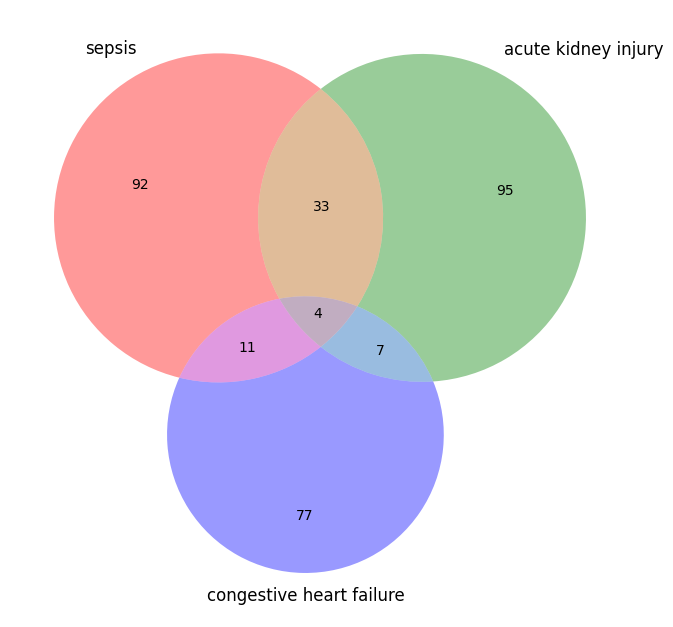

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# CSV 파일 읽기 (이미 전처리된 데이터셋)
df = pd.read_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023.csv', usecols=['Subjective', 'Objective', 'Summary', 'cleaned_expanded_Summary', 'terms'])
df = df.fillna('').apply(lambda x: x.str.lower())
df['combined_summary'] = df['Summary'] + df['cleaned_expanded_Summary'] + df['terms']

key1 = 'sepsis'
key2 = 'acute kidney injury'
key3 = 'congestive heart failure'
# key4 = 'gi_bleed'
# 각 질병에 대해 인스턴스(행) 인덱스 집합 생성
set1 = set(df[df['combined_summary'].str.contains('|'.join(prob_dict[key1]).lower(), regex=True, na=False)].index)
set2 = set(df[df['combined_summary'].str.contains('|'.join(prob_dict[key2]).lower(), regex=True, na=False)].index)
set3 = set(df[df['combined_summary'].str.contains('|'.join(prob_dict[key3]).lower(), regex=True, na=False)].index)
# set4 = set(df[df['combined_summary'].str.contains('|'.join(prob_dict[key4]), regex=True, na=False)].index)

plt.figure(figsize=(8, 8))
venn3([set1, set2, set3], (key1, key2, key3))
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_indicators, plot

for name, lst in prob_dict.items():
    # df[name] = df['combined_summary'].str.contains('|'.join(lst), regex=True, na=False)
    lst = [term.lower() for term in lst]
    pattern = '|'.join(lst)
    con = (df['combined_summary'].str.contains(pattern, na=False, regex=True) &
        ~df['Subjective'].str.contains(pattern, na=False, regex=True) &
        ~df['Objective'].str.contains(pattern, na=False, regex=True))
    df[name] = con

# UpSet Plot을 위한 데이터셋 생성
binary_df = df[list(prob_dict.keys())]
upset_data = from_indicators(binary_df.columns.tolist(), binary_df)

plt.figure(figsize=(10, 6))
plot(upset_data) 
plt.show()

NameError: name 'df' is not defined

In [21]:
df = binary_df
print(df[df[list(prob_dict.keys())].sum(axis=1) > 0].shape)
print(df[df[list(prob_dict.keys())].sum(axis=1) > 1].shape)
print(df[df[list(prob_dict.keys())].sum(axis=1) > 2].shape)

(445, 14)
(107, 14)
(23, 14)


In [ ]:
filtered_df.loc[675].Objective

In [ ]:
prob = "renal failure"
prob2 = "ARF"
prob3 = "CRF"
n=0
df = pd.read_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023.csv')[['Assessment', 'Summary', 'Subjective', 'Objective', 'cleaned_expanded_Summary', 'terms']]
for i, row in df.iterrows():
    sub = row['Subjective']
    obj = row['Objective']
    sum = row['Summary'] + row['cleaned_expanded_Summary'] + row['terms']
    if type(sum) != str or type(sub) != str or type(obj) != str:
        continue
    sub = sub.lower()
    obj = obj.lower()
    sum = sum.lower()
    if (prob in sum) and (prob not in sub) and (prob not in obj) and (prob2 not in sub) and (prob2 not in obj) and (prob3 not in sub) and (prob3 not in obj):
        n+=1
        print(i, row['Summary'])
n

In [ ]:
term_set = set()
df = pd.read_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023_interest.csv')[['Subjective', 'Objective', 'Assessment', 'terms']]
df['terms'] = df['terms'].apply(lambda x: ast.literal_eval(x))
for i in range(len(df)):
    term_set.update(df['terms'][i])

In [ ]:
sorted_term_set = sorted(list(term_set))
sorted_term_set = [x for x in sorted_term_set if x != '']
", ".join(sorted_term_set)

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term_idx in range(0, len(terms_interest)-1, 2):
    problem_1 = terms_interest[term_idx]
    problem_2 = terms_interest[term_idx+1]
    df = pd.read_csv(f"/home/yl3427/cylab/SOAP_MA/data/0212_results_multi_{problem_1}_{problem_2}.csv")
    print(len(df))

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    df = pd.read_csv(f"/home/yl3427/cylab/SOAP_MA/data/0212_results_single_{term}.csv")[["terms", f"{term}", f"is_{term.replace(' ', '_')}_baseline", f"is_{term.replace(' ', '_')}_ltm"]]
    print(len(df))
    print("-------------------")

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    df = pd.read_csv(f"/home/yl3427/cylab/SOAP_MA/data/0212_results_single_{term}.csv")[["terms", f"{term}", f"is_{term.replace(' ', '_')}_baseline", f"is_{term.replace(' ', '_')}_ltm"]]
    
    results = evaluate_results(df, term)
    print(f"Baseline {term} F1: {results['baseline']['f1_score']:.3f}")
    print(f"LTM {term} F1: {results['ltm']['f1_score']:.3f}")
    print()
    print(f"Baseline {term} Precision: {results['baseline']['precision']:.3f}")
    print(f"LTM {term} Precision: {results['ltm']['precision']:.3f}")
    print()
    print(f"Baseline {term} Recall: {results['baseline']['recall']:.3f}")
    print(f"LTM {term} Recall: {results['ltm']['recall']:.3f}")
    print("====================================")

In [ ]:
terms_interest = [
    'hypertension', 'acute renal failure', 'atrial fibrillation', 'anemia',
    'coronary artery disease', 'hypotension', 'altered mental status',
    'respiratory failure', 'diabetes mellitus', 'leukocytosis'
]

for term in terms_interest:
    df = pd.read_csv(
        f"/home/yl3427/cylab/SOAP_MA/data/0212_results_single_{term}.csv"
    )[["terms", f"{term}", 
       f"is_{term.replace(' ', '_')}_baseline", 
       f"is_{term.replace(' ', '_')}_ltm"]]
    
    results = evaluate_results(df, term)
    
    # 표 헤더 출력
    print(f"Results for: {term}")
    print("=" * 48)
    print(f"{'':<12}{'Precision':>12}{'Recall':>12}{'F1':>12}")
    print("-" * 48)
    
    # Baseline 결과 출력
    print(f"{'Baseline':<12}"
          f"{results['baseline']['precision']:>12.3f}"
          f"{results['baseline']['recall']:>12.3f}"
          f"{results['baseline']['f1_score']:>12.3f}")
    
    # LTM 결과 출력
    print(f"{'LTM':<12}"
          f"{results['ltm']['precision']:>12.3f}"
          f"{results['ltm']['recall']:>12.3f}"
          f"{results['ltm']['f1_score']:>12.3f}")
    
    print("\n")


In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term_idx in range(0, len(terms_interest)-1, 2):
    problem_1 = terms_interest[term_idx]
    problem_2 = terms_interest[term_idx+1]
    print(f"<Given LTM for {problem_1} and {problem_2}>")
    print()
    df = pd.read_csv(f"/home/yl3427/cylab/SOAP_MA/data/0212_results_multi_{problem_1}_{problem_2}.csv")
    results = evaluate_results(df, problem_1)

    # 표 헤더 출력
    print(f"Results for: {problem_1}")
    print("=" * 48)
    print(f"{'':<12}{'Precision':>12}{'Recall':>12}{'F1':>12}")
    print("-" * 48)
    
    # Baseline 결과 출력
    print(f"{'Baseline':<12}"
          f"{results['baseline']['precision']:>12.3f}"
          f"{results['baseline']['recall']:>12.3f}"
          f"{results['baseline']['f1_score']:>12.3f}")
    
    # LTM 결과 출력
    print(f"{'LTM':<12}"
          f"{results['ltm']['precision']:>12.3f}"
          f"{results['ltm']['recall']:>12.3f}"
          f"{results['ltm']['f1_score']:>12.3f}")
    
    print("\n")


    results = evaluate_results(df, problem_2)
    # 표 헤더 출력
    print(f"Results for: {problem_2}")
    print("=" * 48)
    print(f"{'':<12}{'Precision':>12}{'Recall':>12}{'F1':>12}")
    print("-" * 48)
    
    # Baseline 결과 출력
    print(f"{'Baseline':<12}"
          f"{results['baseline']['precision']:>12.3f}"
          f"{results['baseline']['recall']:>12.3f}"
          f"{results['baseline']['f1_score']:>12.3f}")
    
    # LTM 결과 출력
    print(f"{'LTM':<12}"
          f"{results['ltm']['precision']:>12.3f}"
          f"{results['ltm']['recall']:>12.3f}"
          f"{results['ltm']['f1_score']:>12.3f}")
    
    print("\n")

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    print(term)
    df = pd.read_csv(f"/home/yl3427/cylab/SOAP_MA/data/0212_results_{term}.csv")
    for i, row in df.iterrows():
        # print(row["terms"], row["anemia"], row["is_anemia_baseline"], row["is_anemia_ltm"])
        # print(row["Subjective"], row["Objective"], row["Assessment"])
        # print("-------------------")
        pass
    print(df["terms"].values)
    print("-------------------")

In [ ]:
def safe_eval(cell):
    if pd.isna(cell) or not isinstance(cell, str):
        print(cell)
        return cell
    return ast.literal_eval(cell)

In [ ]:
df = pd.read_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023.csv')

In [ ]:
df.dropna(inplace=True, ignore_index=True)

In [ ]:
df['terms'] = df['terms'].apply(safe_eval)

In [ ]:
df['terms']

In [ ]:
for i, row in df.iterrows():
    if type(row['terms']) != list:
        print(f"{i} is not a list: {row}")


In [ ]:
for i, row in df.iterrows():
    if "rectal prolapse" in str(row['terms']):
        txt = row['Subjective'] + row['Objective']
        txt = txt.lower()
        if ("rectal prolapse" not in txt):
            print(row['terms'])
            print(txt)
            print("----------")

In [ ]:
for i, row in df.iterrows():
    if "sepsis" in str(row['terms']):
        txt = row['Subjective'] + row['Objective']
        txt = txt.lower()
        if ("sepsis" not in txt) and ("septic" not in txt):
            print(row['terms'])
            print(txt)
            print("----------")

In [ ]:
term_set = set()
for terms in df['terms']:
    term_set.update(terms)
sorted(term_set)

In [ ]:
term_counts = defaultdict(int)
for terms in df['terms']:
    for item in terms:
        term_counts[item] += 1

In [ ]:
sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

In [ ]:
terms_interest = [k for k, v in sorted(term_counts.items(), key=lambda x: x[1], reverse=True)[:10]]

In [ ]:
sorted(term_counts.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
terms_interest

In [ ]:
for i, row in df.iterrows():
    for term in terms_interest:
        if term == 'diabetes mellitus':
            if ('diabetic' in str(row['terms'])) or ('diabetes' in str(row['terms'])):
                df.at[i, term] = True
            else:
                df.at[i, term] = False
        else:
            if term in str(row['terms']):
                df.at[i, term] = True
            else:
                df.at[i, term] = False

In [ ]:
df_interest = df[df[terms_interest].any(axis=1)].reset_index(drop=True)
df_interest

In [ ]:
df_interest.to_csv('/home/yl3427/cylab/SOAP_MA/data/mergedBioNLP2023_interest.csv', index=False)

In [ ]:
terms_interest

In [ ]:
split = {key: [] for key in terms_interest}
for term in terms_interest:
    for i, row in df_interest.iterrows():
        if row[term]:
            split[term].append(row['File ID'])

In [ ]:
for k, v in split.items():
    print(f"{k}: {len(v)}")

# save split into pickle
with open('/home/yl3427/cylab/SOAP_MA/data/split.pkl', 'wb') as f:
    pickle.dump(split, f)

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    train_ids = split[term][:10]
    train_df = df_interest[df_interest['File ID'].isin(train_ids)]
    print(train_df[terms_interest])


In [ ]:
from pydantic import BaseModel, Field
from typing import List
class ResponseDiagnosisWithReasoning(BaseModel):
    reasoning: str = Field(
        ...,
        description="Step-by-step reasoning that leads to the final diagnosis."
    )
    diagnosis: bool = Field(
        ...,
        description="Binary diagnosis: True if patient has the disease, False otherwise."
    )
ResponseDiagnosisWithReasoning.model_json_schema()

# Load LTM

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term_idx in range(0, len(terms_interest)-1, 2):
    problem_1 = terms_interest[term_idx]
    problem_2 = terms_interest[term_idx + 1]
    print(problem_1, problem_2)

In [ ]:
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    print(term)
    with open(f"/home/yl3427/cylab/SOAP_MA/ltm_per_disease/0212_memory_{term}.pkl", "rb") as file:
        ltm = pickle.load(file)

    print(f"\t# of items: {len(ltm)}")
    print(f"\tTotal characters: {sum([len(item) for item in ltm])}")
    # print(ltm)
    print("-------------------")

In [ ]:
ltm

In [ ]:
prompt_test_multi_baseline = """
You are provided with only the Subjective (S) and Objective (O) sections of a new patient's SOAP-formatted progress note that may be relevant to one or more of the following diseases:

1. {PROBLEM_1}
2. {PROBLEM_2}

Patient Report:
<Subjective>
{subj}
</Subjective>

<Objective>
{obj}
</Objective>

For each of the diseases, provide a detailed, step-by-step reasoning on how you arrive at a conclusion based on the patient report, and then state a final binary diagnosis ("True" if the patient is diagnosed with the disease, "False" if not).

Format your answer as valid JSON exactly as follows:
{{
    "diagnoses": {{
         "{PROBLEM_1}": {{
              "reasoning": "Your reasoning here...",
              "diagnosis": true_or_false
         }},
         "{PROBLEM_2}": {{
              "reasoning": "Your reasoning here...",
              "diagnosis": true_or_false
         }}
    }}
}}

Ensure that the reasoning comes before the diagnosis for each disease.
"""

In [ ]:
from pydantic import BaseModel, Field, create_model

# Define the DiseaseDiagnosis model first.
class DiseaseDiagnosis(BaseModel):
    reasoning: str = Field(..., description="Step-by-step reasoning that leads to the final diagnosis.")
    diagnosis: bool = Field(..., description="Binary diagnosis: True if the patient has the disease, False otherwise.")

# Assume these values are provided dynamically.
problem_1 = "Hypertension"
problem_2 = "Acute Renal Failure"

DynamicResponseMultiDiagnosis = create_model(
    'DynamicResponseMultiDiagnosis',
    **{
        problem_1: (DiseaseDiagnosis, ...),
        problem_2: (DiseaseDiagnosis, ...),
    }
)

DynamicResponseMultiDiagnosis.model_json_schema()

In [ ]:
DiseaseDiagnosis.model_json_schema()

In [ ]:
ltm_dict = {}
terms_interest = ['hypertension','acute renal failure',
                      'atrial fibrillation','anemia','coronary artery disease',
                      'hypotension', 'altered mental status', 'respiratory failure',
                      'diabetes mellitus', 'leukocytosis']
for term in terms_interest:
    with open(f"/home/yl3427/cylab/SOAP_MA/ltm_per_disease/0211_memory_{term}.pkl", "rb") as file:
        ltm = pickle.load(file)
        ltm_dict[term] = ltm[1]

In [ ]:
for k, v in ltm_dict.items():
    print(f"{k}: {len(v)}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_results(df, term):

    label_col = term
    baseline_col = f"is_{term.replace(' ', '_')}_baseline"
    ltm_col = f"is_{term.replace(' ', '_')}_ltm"
    
    df[label_col] = df[label_col].replace({'True': True, 'False': False})
    df[label_col] = df[label_col].astype(bool)

    df[baseline_col] = df[baseline_col].replace({'True': True, 'False': False})
    df[baseline_col] = df[baseline_col].astype(bool)

    df[ltm_col] = df[ltm_col].replace({'True': True, 'False': False})
    df[ltm_col] = df[ltm_col].astype(bool)

    num_original_rows = len(df)

    filtered_df = df.dropna(subset=[label_col, baseline_col, ltm_col])

    # debug_target_values(filtered_df, label_col, baseline_col, ltm_col)
  
    num_rows_dropped = num_original_rows - len(filtered_df)
    num_rows_evaluated = len(filtered_df)
    print(f"Number of rows dropped: {num_rows_dropped}")
    print(f"Number of rows evaluated: {num_rows_evaluated}")

    y_true = filtered_df[label_col]
    y_pred_baseline = filtered_df[baseline_col]
    y_pred_ltm = filtered_df[ltm_col]

    prec_baseline = precision_score(y_true, y_pred_baseline, zero_division=0)
    rec_baseline  = recall_score(y_true, y_pred_baseline, zero_division=0)
    f1_baseline   = f1_score(y_true, y_pred_baseline, zero_division=0)

    prec_ltm = precision_score(y_true, y_pred_ltm, zero_division=0)
    rec_ltm  = recall_score(y_true, y_pred_ltm, zero_division=0)
    f1_ltm   = f1_score(y_true, y_pred_ltm, zero_division=0)

    return {
        "num_original_rows": num_original_rows,
        "num_rows_dropped": num_rows_dropped,
        "num_rows_evaluated": num_rows_evaluated,
        "baseline": {
            "precision": prec_baseline,
            "recall":    rec_baseline,
            "f1_score":  f1_baseline
        },
        "ltm": {
            "precision": prec_ltm,
            "recall":    rec_ltm,
            "f1_score":  f1_ltm
        }
    }

def debug_target_values(df, label_col, baseline_col, ltm_col):
    print("Unique values in label:", df[label_col].unique())
    print("Unique values in baseline:", df[baseline_col].unique())
    print("Unique values in ltm:", df[ltm_col].unique())

    print("Label dtype:", df[label_col].dtype)
    print("Baseline dtype:", df[baseline_col].dtype)
    print("LTM dtype:", df[ltm_col].dtype)


In [ ]:
terms_lst = [
    "acute renal failure",
    "anemia",
    "atrial fibrillation",
    "coronary artery disease",
    "hypertension",
]